# Twitter Trends Analysis with Machine Learning
### Utilized Python, Twitter API, matplotlib, textblob, NumPy arrays, and classification estimators (KNN, SVC, GaussianNB) to analyze tweets and their associated sentiments, location, retweets, language, etc. in a specific city. 

### Karthik Malyala || 4/20/2021

### Step 1: First, let's setup our Twitter API keys and use the Twitter Trends API to determine the available trending topics for Cincinnati (city of my choice), and assign a tweet volume of 5000 to any trend with no volume provided.

In [38]:
## STEP 1

# Imports the required libraries
import tweepy
import os

# Please replace the blanks with your personal access key and token
APIK = ''
APISK = ''
ACCTO = ''
ACCTOS = ''

auth = tweepy.OAuthHandler(APIK,APISK)
auth.set_access_token(ACCTO,ACCTOS) 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Finds the trends for the particular city ( I chose Cincinnati, OH)
cin_trends_comp = api.trends_place(id = 2380358)
api.rate_limit_status()['resources']['trends']['/trends/place']
cin_trends = cin_trends_comp[0]['trends']

# Assigns tweet volume of 5000 to those with no volume provided
for t in cin_trends:
    if (t['tweet_volume'] == None):
        t['tweet_volume'] = 5000

### Step 2: After sorting the trends in descending order by volume, let's create a bar graph with each (sorted) trend on the y-axis against its volume on the x-axis.

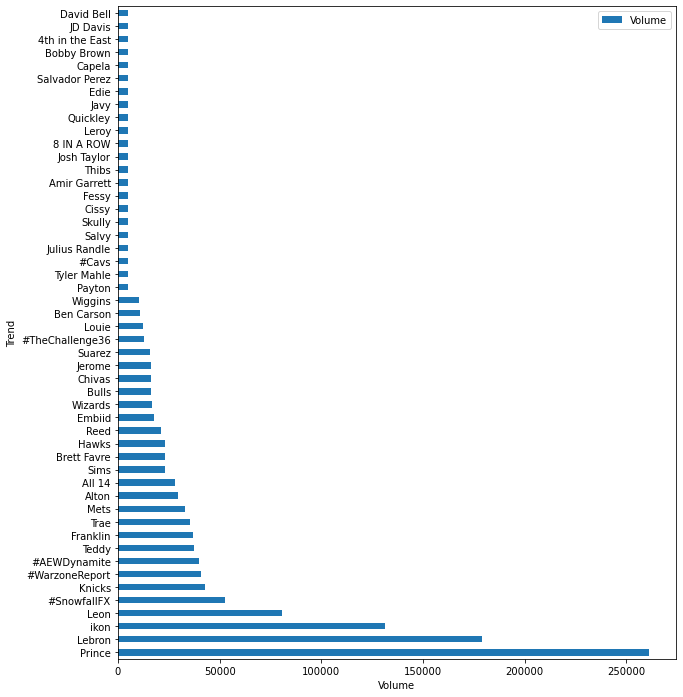

In [42]:
## STEP 2

# Imports the required libraries
from operator import itemgetter
import matplotlib.pyplot as plt
import pandas as pd

# Sorts the trends by tweet volume
cin_trends.sort(key=itemgetter('tweet_volume'), reverse=True)
cin_topics = {}

# Creates a dictionary for the trends and respective volume 
for trend in cin_trends:
    cin_topics[trend['name']] = trend['tweet_volume']

# Turns the dictionary into a dataframe for bar plot representation
cinDF = pd.DataFrame(list(cin_topics.items()), columns = ['Trend', 'Volume'])

# Moves the trends to the y-axis for easy reading with their respective volume on the x-axis
cinPlot = cinDF.plot.barh(x = 'Trend', y = 'Volume', figsize = (10,12))
cinPlot.set_ylabel('Trend')
cinPlot.set_xlabel('Volume')
plt.show() # Displays the plot

### Step 3: Now, let's use the Twitter Search API to find 100 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets.

In [43]:
## STEP 3

import preprocessor as p

# Gets the top three trends
trendOne =  (cin_trends[0]['name'])
trendTwo =  (cin_trends[1]['name'])
trendThree =  (cin_trends[2]['name'])

# Searches 100 tweets for each of the top three trends using the Twitter Search API
tweetsOne = api.search(q = trendOne, count = 100)
tweetsTwo = api.search(q = trendTwo, count = 100)
tweetsThree = api.search(q = trendThree, count = 100)
api.rate_limit_status()['resources']['search']['/search/tweets']

tweetsOnePrep = []
tweetsTwoPrep = []
tweetsThreePrep = []

for tweet in tweetsOne:
    tweetsOnePrep.append(p.clean(tweet.text))

for tweet in tweetsTwo:
    tweetsTwoPrep.append(p.clean(tweet.text))

for tweet in tweetsThree:
    tweetsThreePrep.append(p.clean(tweet.text))

### Step 4: Using the top 100 tweets for the three most popular trends, we will now use TextBlob to determine the sentiment for each set of 100 tweets.

In [44]:
## STEP 4

from textblob import TextBlob

# Creates a dictionary for each trend's sentiment summary
tweetsOneSentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
tweetsTwoSentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
tweetsThreeSentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}

# Iterates through pre-processed tweets of each trend in for loops and adds to the respective sentiment dictionary
for tweet in tweetsOnePrep:
    tweetBlob = TextBlob(tweet)
    if tweetBlob.sentiment.polarity > 0:
        tweetsOneSentiment['Positive'] += 1
    elif tweetBlob.sentiment.polarity == 0:
        tweetsOneSentiment['Neutral'] += 1
    else:
        tweetsOneSentiment['Negative'] += 1

for tweet in tweetsTwoPrep:
    tweetBlob = TextBlob(tweet)
    if tweetBlob.sentiment.polarity > 0:
        tweetsTwoSentiment['Positive'] += 1
    elif tweetBlob.sentiment.polarity == 0:
        tweetsTwoSentiment['Neutral'] += 1
    else:
        tweetsTwoSentiment['Negative'] += 1
        
for tweet in tweetsThreePrep:
    tweetBlob = TextBlob(tweet)
    if tweetBlob.sentiment.polarity > 0:
        tweetsThreeSentiment['Positive'] += 1
    elif tweetBlob.sentiment.polarity == 0:
        tweetsThreeSentiment['Neutral'] += 1
    else:
        tweetsThreeSentiment['Negative'] += 1

# Prints the trend sentiment results
print(f'Trend 1: "{trendOne}" \nSentiment Analysis = {tweetsOneSentiment}\n')
print(f'Trend 2: "{trendTwo}" \nSentiment Analysis = {tweetsTwoSentiment}\n')
print(f'Trend 3: "{trendThree}" \nSentiment Analysis = {tweetsThreeSentiment}')


Trend 1: "Prince" 
Sentiment Analysis = {'Positive': 36, 'Neutral': 52, 'Negative': 11}

Trend 2: "Lebron" 
Sentiment Analysis = {'Positive': 16, 'Neutral': 46, 'Negative': 19}

Trend 3: "ikon" 
Sentiment Analysis = {'Positive': 40, 'Neutral': 43, 'Negative': 17}


As seen above, there is a substantial difference in the proportion of positive and negative sentiment for the three trends. I will explain why in a trend-by-trend format:
1) "Prince" - It is the five year anniversary of famous American singer-songwriter Prince's death today on April 21st, 2021. As a result, many trending tweets on Twitter are reminiscing over memories with Prince's songs and how it has impacted their life. There is a more positive sentiment than a negative sentiment on this trend because people are sharing happy memories with his music. However, the negative sentiment tweets may analyze on the keyword "death" within the tweet.

2) "Lebron" - This trend has more of a negative sentiment than positive because famous NBA Athlete Lebron James had recently deleted a tweet of his that condemned the killing of a teenage girl in Columbus. This is more negative due to many people getting pressed about the fact that LeBron had not once spoke about any other event other than his own hometown, Ohio.

3) "ikon" - This trend has a significantly more poitive sentiment than negative because of KPOP boy band iKon releasing new songs that people are super happy and impressed about. On Twitter, several users shared their love for the KPOP band which shows why this trend has more of a positive sentiment

## Machine Learning Addition
### Step 5: To apply ML processing, let us choose one of the toy datasets bundled with sklearn (I chose the Diabetes dataset below) and train three distinct sklearn classification estimators for the chosen dataset to compare the results for which one performs the best when using 2-fold cross-validation.

In [45]:
## STEP 5

# Imports all the required libraries and estimators ( KNN, SVC, and Gaussian specifically)
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Loads data from the Diabetes toy dataset
diabetes = load_diabetes()
# Creates a dictionary for the estimators using two-fold cross-valuation
estimatorsTwo = {'KNeighborsClassifier': KNeighborsClassifier(), 'SVC': SVC(), 'GaussianNB': GaussianNB()}

# Calculates the performance scores for all three estimator models using a 2-fold cross-validation
for name, estObject in estimatorsTwo.items():
    kfold = KFold(n_splits = 2, random_state = 3, shuffle = True)
    scores = cross_val_score(estimator = estObject, X = diabetes.data, y = diabetes.target, cv = kfold)
    print(f'{name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=0.45%; standard deviation=0.00%
                 SVC: mean accuracy=1.13%; standard deviation=0.68%
          GaussianNB: mean accuracy=0.45%; standard deviation=0.00%


### Step 6: For comparison purposes, let's try to repeat Step 5 with a 20-fold cross-validation instead of a 2-fold cross-validation

In [46]:
## STEP 6

# Creates a dictionary for the estimators using two-fold cross-valuation
estimatorsTwenty = {'KNeighborsClassifier': KNeighborsClassifier(), 'SVC': SVC(), 'GaussianNB': GaussianNB()}

# Calculates the performance scores for all three estimator models using a 20-fold cross-validation
for estimator_name, estimator_object in estimatorsTwenty.items():
    kfold = KFold(n_splits = 2, random_state = 11, shuffle = True)
    scores = cross_val_score(estimator=estimator_object, X = diabetes.data, y = diabetes.target, cv = kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=0.45%; standard deviation=0.45%
                 SVC: mean accuracy=0.23%; standard deviation=0.23%
          GaussianNB: mean accuracy=0.45%; standard deviation=0.45%


### 2-Fold vs. 20-Fold Cross-Validation Explanation

There is not a huge difference in the results when using a 20-fold vs 2-fold cross-validation in terms with the diabetes toy dataset. It can be seen how mean accuracy for KNN and Gaussian stay the same for both while it decreases for SVC. The standard deviation varied with the 2-fold but it was the same as the respective mean accuracy for all three estimators when using the 20-fold approach. This can be due to the compute time growing in proportion to k or the underfitting/overfitting complexity of the models that I have chose. Although 2-fold approach is sufficient for analysis, a 20-fold approach makes it more defined as more segments of the dataset are being accessed at once.